In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=bb3d64e5d2394ae27536fc251d7f4349fd5c3cced09a404a75718e6511114086
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [3]:
import yfinance as yf
import pandas as pd

In [147]:
data=yf.download("AAPL",start="2014-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [148]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.655001,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.267195,392467600
2014-01-06,19.194643,19.528572,19.057142,19.426071,17.361351,412610800
2014-01-07,19.440001,19.498571,19.211428,19.287144,17.237186,317209200
2014-01-08,19.243214,19.484285,19.238928,19.409286,17.346355,258529600


In [149]:
len(data)

1509

In [151]:
data.loc["2015-01-02":,:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,70.513535,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,70.580566,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.980911,93121200


In [152]:
def PER(p):
  # print(p)
  r=[]
  for i in range(0,252):
    r+=[-1]
  for i in range(252,len(p)):
    r+=[p[i]-p[i-252]]
  return r



In [153]:
r=PER(data["Close"])
type(r)
data["PER"]=r

In [154]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,PER
Date,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.655001,234684800,-1.0
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.267195,392467600,-1.0
2014-01-06,19.194643,19.528572,19.057142,19.426071,17.361351,412610800,-1.0
2014-01-07,19.440001,19.498571,19.211428,19.287144,17.237186,317209200,-1.0
2014-01-08,19.243214,19.484285,19.238928,19.409286,17.346355,258529600,-1.0


In [155]:
def Gain(p):
  r=[]
  r+=[0]
  for i in range(1,len(p)):
    r+=[p[i]-p[i-1]]
  return r

In [156]:
r=Gain(data["Close"])

In [157]:
data["Gain"]=r

In [158]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,PER,Gain
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.655001,234684800,-1.0,0.000000
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.267195,392467600,-1.0,-0.433928
2014-01-06,19.194643,19.528572,19.057142,19.426071,17.361351,412610800,-1.0,0.105356
2014-01-07,19.440001,19.498571,19.211428,19.287144,17.237186,317209200,-1.0,-0.138927
2014-01-08,19.243214,19.484285,19.238928,19.409286,17.346355,258529600,-1.0,0.122143


In [159]:
def RS(p):
  x=len(p)
  ag=[]
  al=[]
  for i in p:
    if i>0:
      ag+=[i]
    else :
      # print(i)
      al+=[abs(i)]
  # print(len(al),len(ag))
  if len(al)==0:
    return 1000000000000
  return sum(ag)/sum(al)


In [166]:
def RSI(p):
  r=[]
  for i in range(0,252):
    r+=[-1]
  for i in range(252,len(p)):
    rs=RS(p[i-13:i+1])
    rsi=100-(100/(1+rs))
    r+=[rsi]
  return r


In [167]:
r=RSI(data["Gain"])
data["RSI"]=r

In [168]:
data.loc["2015-01-02":,:].head(15)

,Open,High,Low,Close,Adj Close,Volume,PER,Gain,Target,RSI
Date,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400,7.577858,-0.262499,0,44.378987
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000,7.241785,-0.770000,1,41.929493
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400,7.138929,0.002501,1,45.092176
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600,7.650356,0.372499,1,52.490040
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000,8.563213,1.035000,1,55.751382
2015-01-09,28.167500,28.312500,27.552500,28.002501,25.552891,214798000,8.841072,0.030001,0,48.264644
2015-01-12,28.150000,28.157499,27.200001,27.312500,24.923252,198603200,8.278929,-0.690001,1,43.777672
2015-01-13,27.857500,28.200001,27.227501,27.555000,25.144543,268367600,8.421785,0.242500,0,43.247266
2015-01-14,27.260000,27.622499,27.125000,27.450001,25.048731,195826400,7.936071,-0.105000,0,43.204369


In [169]:
def target(p):
  r=[]
  for i in range(0,252):
    r+=[-1]
  for i in range(252,len(p)-1):
    if p[i+1]>p[i]:
      r+=[1]
    else:
      r+=[0]
  r+=[-1]
  return r


In [170]:
r=target(data["Close"])
data["Target"]=r

In [171]:
data.loc["2015-01-02":,:].head()

,Open,High,Low,Close,Adj Close,Volume,PER,Gain,Target,RSI
Date,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400,7.577858,-0.262499,0,44.378987
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000,7.241785,-0.770000,1,41.929493
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400,7.138929,0.002501,1,45.092176
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600,7.650356,0.372499,1,52.490040
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000,8.563213,1.035000,1,55.751382


In [537]:
pv=pd.read_csv("apple_pageviews.csv")
pv.head()

,Date,Apple Inc.
0,2015-07-01,11551
1,2015-07-02,12192
2,2015-07-03,10946
3,2015-07-04,9718
4,2015-07-05,10826


In [513]:
dates=data.index.strftime('%Y-%m-%d').to_list()

In [538]:
def wiki_views(p):
  r=[]
  for i in p:
    xx=pv[pv["Date"]==i]["Apple Inc."].values
    if len(xx)!=0:
       r+=[pv[pv["Date"]==i]["Apple Inc."].values[0]]
    else:
      r+=[-1]
  return r

In [539]:
r=wiki_views(dates)

In [540]:
data["Wiki_hits"]=r

In [780]:
def wiki_move(p):
  r=[0]
  for i in range(1,len(p)):
    r+=[p[i]-p[i-1]]
  # r+=[-1]

  return r

In [781]:
r=wiki_move(data["Wiki_hits"].values)
data["Wiki_move"]=r

In [782]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,PER,Gain,Target,RSI,Wiki_hits,Wiki_move
Date,,,,,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.655001,234684800,-1.0,0.000000,-1,-1.0,-1,0
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.267195,392467600,-1.0,-0.433928,-1,-1.0,-1,0
2014-01-06,19.194643,19.528572,19.057142,19.426071,17.361351,412610800,-1.0,0.105356,-1,-1.0,-1,0
2014-01-07,19.440001,19.498571,19.211428,19.287144,17.237186,317209200,-1.0,-0.138927,-1,-1.0,-1,0
2014-01-08,19.243214,19.484285,19.238928,19.409286,17.346355,258529600,-1.0,0.122143,-1,-1.0,-1,0


In [818]:
X=data.loc["2015-07-01":"2019-12-27",:][["Open","High","Low","Close","PER","Wiki_move"]]
Y=data.loc["2015-07-01":"2019-12-27",:]["Target"]

In [819]:
X.head()

,Open,High,Low,Close,PER,Wiki_move
Date,,,,,,
2015-07-01,31.725000,31.735001,31.497499,31.650000,8.2700,11552
2015-07-02,31.607500,31.672501,31.442499,31.610001,8.2400,641
2015-07-06,31.235001,31.557501,31.212500,31.500000,7.9925,-481
2015-07-07,31.472500,31.537500,30.942499,31.422501,7.4300,1794
2015-07-08,31.120001,31.160000,30.635000,30.642500,6.8050,1049


In [820]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

In [821]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=6)

In [822]:
len(X_train)

1018

In [823]:
(len(Y_train)-sum(Y_train))/len(Y_train)

0.46954813359528486

In [824]:
(len(Y_test)-sum(Y_test))/len(Y_test)

0.47368421052631576

In [1014]:
rf=RandomForestClassifier(n_estimators=150,max_depth=7,oob_score=True,max_features="log2",criterion="gini",max_samples=0.7,min_impurity_decrease=0.0009,random_state=7)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0009, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=True, random_state=7, verbose=0,
                       warm_start=False)

In [1015]:
rf.oob_score_

0.4715127701375246

In [1016]:
rf.score(X_train,Y_train)


0.81237721021611

In [1017]:
rf.score(X_test,Y_test)

0.6052631578947368

In [853]:
import graphviz
from sklearn import tree

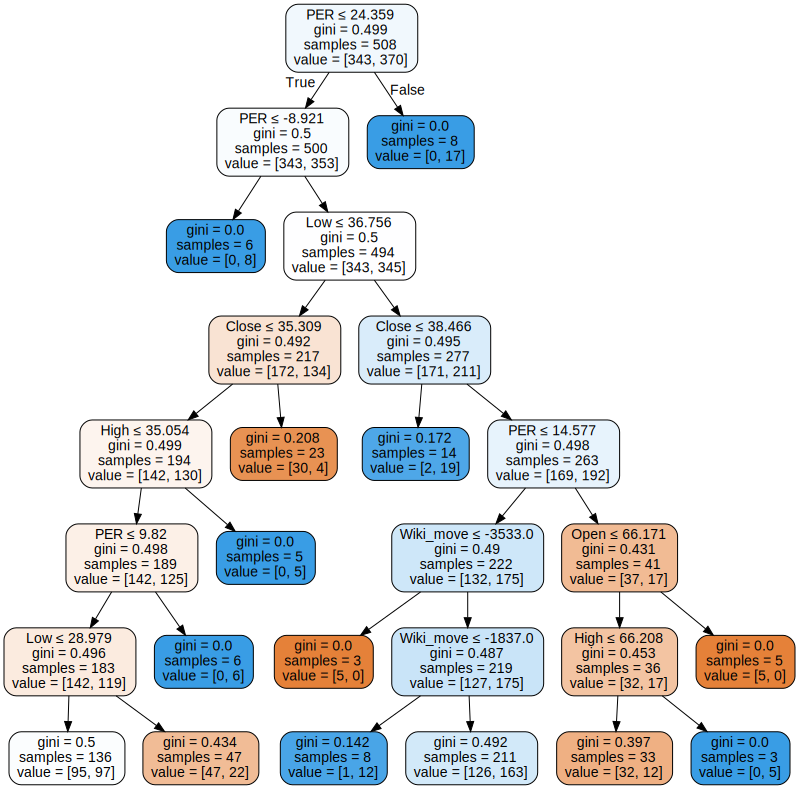

In [854]:
dot_data=tree.export_graphviz(rf[6], out_file=None,feature_names=X_train.columns,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [855]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [1138]:
clf = make_pipeline(StandardScaler(), SVC(gamma="scale",kernel="rbf",C=2))

In [1139]:
clf.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=2, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [1140]:
clf.score(X_train,Y_train)

0.5550098231827112

In [1141]:
clf.score(X_test,Y_test)

0.5701754385964912